# Teste t Pareado: Comparando o desempenho de estudantes

Este notebook foi elaborado para avaliar os conhecimentos obtidos na aula introdutória de testes estatísticos, demonstrando como comparar o desempenho de estudantes com o nível de escolaridade dos pais utilizando o teste t pareado. O exemplo utiliza dados de notas finais dos alunos em exames finais.

## 1. Importação de Bibliotecas

Vamos começar importando as bibliotecas essenciais para análise de dados, visualização e execução de testes estatísticos: pandas, matplotlib.pyplot e scipy.stats.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## 2. Carregamento e Visualização dos Dados

Carregamento do conjunto de dados dos hábitos dos estudantes e visualização das primeiras linhas para entender a estrutura dos dados.

In [61]:
# Carregar os dados da tabela
df = pd.read_csv("https://raw.githubusercontent.com/MichaelTRArruda/dados/3d1fdb4c93cd52134126b098a681b0dd280b419d/student_habits_performance.csv")

# Visualizar as primeiras linhas do DataFrame
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


## 3. Estatísticas Descritivas

Vamos calcular estatísticas descritivas (como média, desvio padrão e quartis) para as colunas de nível de escolaridade dos pais e Score dos estudantes.

In [37]:
# Estatísticas descritivas para as colunas de interesse
df[['parental_education_level', 'exam_score']].describe()

,exam_score
count,1000.000000
mean,69.601500
std,16.888564
min,18.400000
25%,58.475000
50%,70.500000
75%,81.325000
max,100.000000


## 4. Visualização de Outliers

Uso boxplots para identificar possíveis outliers.

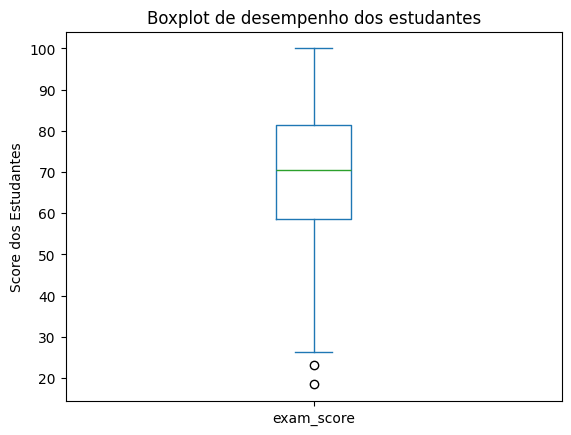

In [38]:
# Boxplot para identificar outliers
df[['exam_score','parental_education_level']].plot(kind='box', title='Boxplot de desempenho dos estudantes')
plt.ylabel('Score dos Estudantes')
plt.show()

## 5. Cálculo e Análise da Diferença das Medidas

Crie uma nova coluna com a diferença entre as pressões antes e depois. Em seguida, visualize a distribuição dessa diferença utilizando um histograma.

Média do score por nível de escolaridade dos pais:
parental_education_level
Bachelor       70.272571
High School    69.547194
Master         68.086826
Name: exam_score, dtype: float64


Diferenças entre as médias de 'exam_score' consecutivas por nível de escolaridade dos pais (ordenado do maior para o menor):
Diferença entre Bachelor e High School: 0.73
Diferença entre High School e Master: 1.46


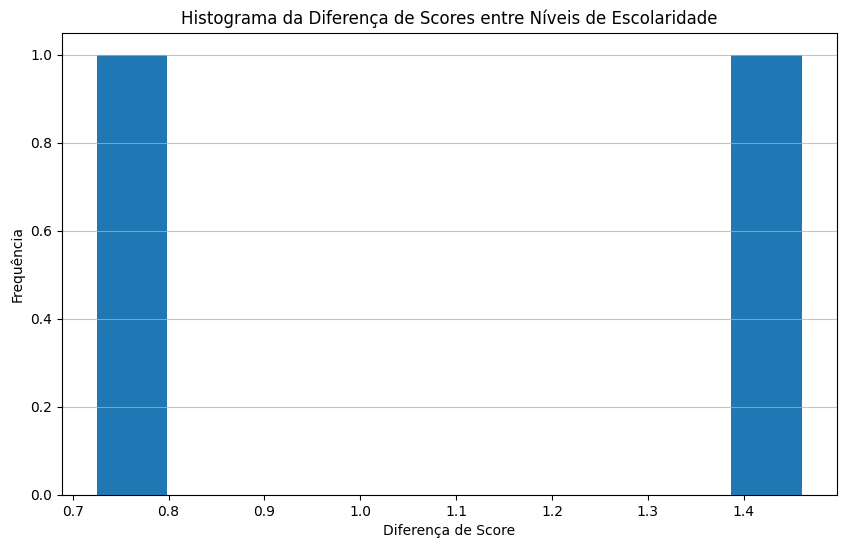

In [39]:
# Calcular a média de Score conforme o nível de escolaridade dos pais
diferenca_score_escolaridade = df.groupby('parental_education_level')['exam_score'].mean().sort_values(ascending=False)

print("Média do score por nível de escolaridade dos pais:")
print(diferenca_score_escolaridade)

print("\n", "="*50, "\n") # Separador para melhor visualização

# Calcular a diferença entre as médias
# Para isso, vamos converter a série para um DataFrame e usar o método diff()
# Ou, de forma mais manual, podemos iterar sobre as médias para calcular as diferenças entre pares

print("Diferenças entre as médias de 'exam_score' consecutivas por nível de escolaridade dos pais (ordenado do maior para o menor):")

# Pega os níveis de educação ordenados por score (do maior para o menor)
escolaridade_por_score = diferenca_score_escolaridade.index

diferencas = []

# Itera sobre os níveis de educação para calcular a diferença entre os consecutivos
for i in range(len(escolaridade_por_score) - 1):
    level1 = escolaridade_por_score[i]
    level2 = escolaridade_por_score[i+1]
    diff = diferenca_score_escolaridade[level1] - diferenca_score_escolaridade[level2]
    print(f"Diferença entre {level1} e {level2}: {diff:.2f}")
    diferencas.append(diff)

# Visualizar a distribuição da diferença
plt.figure(figsize=(10, 6)) # Define o tamanho da figura
pd.Series(diferencas).plot(kind='hist', bins=10, title='Histograma da Diferença de Scores entre Níveis de Escolaridade')
plt.xlabel('Diferença de Score')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75) # Adiciona um grid ao eixo y
plt.show()

## 6. Verificação da Normalidade da Diferença

Antes de aplicar o teste t pareado, é importante verificar se a diferença segue uma distribuição normal. Vamos utilizar o gráfico Q-Q e o teste de Shapiro-Wilk para essa avaliação.

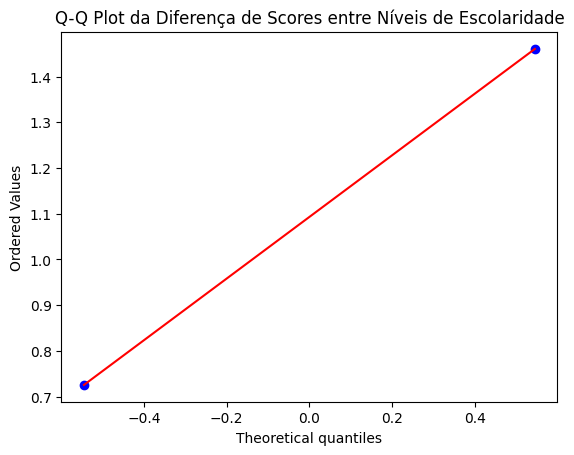

In [40]:
# Gráfico Q-Q para avaliar a normalidade
stats.probplot(pd.Series(diferencas), plot=plt)
plt.title('Q-Q Plot da Diferença de Scores entre Níveis de Escolaridade')
plt.show()

In [41]:
# Teste de Shapiro-Wilk para normalidade
stats.shapiro(pd.Series(diferencas))

<ipython-input-41-bcb9cfccb058>:2: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.shapiro(pd.Series(diferencas))


ShapiroResult(statistic=np.float64(nan), pvalue=np.float64(nan))

### Interpretação

O teste de Shapiro-Wilk, como a maioria dos testes de normalidade, requer um número mínimo de amostras para ser estatisticamente significativo. A documentação geralmente recomenda um tamanho de amostra de pelo menos 3 para que o teste retorne um valor diferente de NaN, mas para que os resultados sejam confiáveis, o ideal é ter um número maior de observações (geralmente acima de 5, e alguns até sugerem 20 ou mais).

## 7. Execução do Teste t Pareado

Agora, vamos realizar o teste t pareado para comparar as médias das pressões arteriais antes e depois da intervenção (2 testes pareados, i.e., "**Pareados: mesmos indivíduos em diferentes situações**")

In [45]:
# Comparar 'master' e 'high school'
grupo_master = df[df['parental_education_level'] == "Master"]['exam_score']
grupo_high_school = df[df['parental_education_level'] == "High School"]['exam_score']

# 2. Realizar o Teste t Independente (ttest_ind)
# Assume variâncias iguais por padrão (equal_var=True).
# Se você não tem certeza se as variâncias são iguais, pode usar equal_var=False (teste de Welch).
t_statistic, p_value = stats.ttest_ind(grupo_master, grupo_high_school, equal_var=True)

print(f"Teste t Independente entre 'master\'s degree' e 'high school':")
print(f"Estatística t: {t_statistic:.3f}")
print(f"Valor p: {p_value:.3f}")

# Interpretação do Valor p:
alpha = 0.05 # Nível de significância comum
if p_value < alpha:
    print(f"O valor p ({p_value:.3f}) é menor que o nível de significância ({alpha}).")
    print("Há evidências estatísticas para rejeitar a hipótese nula.")
    print("Portanto, há uma diferença significativa na média do 'exam_score' entre os dois grupos de escolaridade dos pais.")
else:
    print(f"O valor p ({p_value:.3f}) é maior que o nível de significância ({alpha}).")
    print("Não há evidências estatísticas para rejeitar a hipótese nula.")
    print("Portanto, não há uma diferença significativa na média do 'exam_score' entre os dois grupos de escolaridade dos pais.")

Teste t Independente entre 'master's degree' e 'high school':
Estatística t: -0.946
Valor p: 0.344
O valor p (0.344) é maior que o nível de significância (0.05).
Não há evidências estatísticas para rejeitar a hipótese nula.
Portanto, não há uma diferença significativa na média do 'exam_score' entre os dois grupos de escolaridade dos pais.


## 8. Interpretação dos Resultados

O teste t pareado compara as médias das duas condições (antes e depois) para o **mesmo grupo de indivíduos**.

- **Hipótese nula (H₀):** Não há diferença entre as médias das pressões arteriais antes e depois da intervenção.
- **Hipótese alternativa (H₁):** Existe diferença entre as médias das pressões arteriais antes e depois.

O valor-p obtido indica a probabilidade de observarmos uma diferença igual ou mais extrema que a encontrada, assumindo que a hipótese nula é verdadeira.

- Se o valor-p for menor que o nível de significância (por exemplo, 0,05), rejeitamos a hipótese nula e concluímos que a intervenção teve efeito significativo.
- Se o valor-p for maior que 0,05, não rejeitamos a hipótese nula.

No nosso caso:

In [46]:
from scipy import stats # Importa a biblioteca para testes estatísticos

# Definir os dois grupos que você quer comparar
# Exemplo: Comparar 'master' e 'high school'
grupo1_nome = "Master"
grupo2_nome = "High School"

grupo1_data = df[df['parental_education_level'] == grupo1_nome]['exam_score']
grupo2_data = df[df['parental_education_level'] == grupo2_nome]['exam_score']

# Verificando o tamanho das amostras para evitar o erro NaN
print(f"Número de alunos com pais com '{grupo1_nome}': {len(grupo1_data)}")
print(f"Número de alunos com pais com '{grupo2_nome}': {len(grupo2_data)}")
print("-" * 50)

# Verifique se ambos os grupos têm dados suficientes (geralmente > 1 ou 2 para evitar NaN)
if len(grupo1_data) > 1 and len(grupo2_data) > 1:
    # Realizar o Teste t Independente
    # equal_var=True assume que as variâncias dos dois grupos são iguais.
    # Se você não tem certeza, pode usar equal_var=False (Teste de Welch, mais robusto).
    t_statistic, p_value = stats.ttest_ind(grupo1_data, grupo2_data, equal_var=True)

    print(f"Teste t Independente entre '{grupo1_nome}' e '{grupo2_nome}':")
    print(f"Estatística t: {t_statistic:.3f}")
    print(f"Valor p: {p_value:.3f}")

    # --- Adaptação da interpretação do p-valor para o nosso caso ---
    alpha = 0.05 # Nível de significância (comum)

    if p_value < alpha:
        print(f"\n**Rejeitamos a hipótese nula (H₀):**")
        print(f"O valor-p ({p_value:.3f}) é menor que o nível de significância ({alpha}).")
        print(f"Isso significa que existe uma **diferença estatisticamente significativa** na média do 'exam_score' entre os alunos cujos pais têm '{grupo1_nome}' e aqueles cujos pais têm '{grupo2_nome}'.")
    else:
        print(f"\n**Não rejeitamos a hipótese nula (H₀):**")
        print(f"O valor-p ({p_value:.3f}) é maior ou igual ao nível de significância ({alpha}).")
        print(f"Isso significa que **não há evidências estatísticas suficientes** para afirmar que existe uma diferença significativa na média do 'exam_score' entre os alunos cujos pais têm '{grupo1_nome}' e aqueles cujos pais têm '{grupo2_nome}'.")
else:
    print("\n**ATENÇÃO:** Não foi possível realizar o Teste t Independente.")
    print("Um ou ambos os grupos selecionados têm dados insuficientes para realizar o cálculo.")
    print("Verifique o número de alunos em cada nível de escolaridade antes de executar o teste.")

Número de alunos com pais com 'Master': 167
Número de alunos com pais com 'High School': 392
--------------------------------------------------
Teste t Independente entre 'Master' e 'High School':
Estatística t: -0.946
Valor p: 0.344

**Não rejeitamos a hipótese nula (H₀):**
O valor-p (0.344) é maior ou igual ao nível de significância (0.05).
Isso significa que **não há evidências estatísticas suficientes** para afirmar que existe uma diferença significativa na média do 'exam_score' entre os alunos cujos pais têm 'Master' e aqueles cujos pais têm 'High School'.


# Comparando preços de imóveis:

Verifique se existe diferença para imóveis à venda entre em termos de preço, preço m2 e área entre apartamentos e casas usando testes estatísticos e visualize as distribuições com boxplots.

In [82]:
# filtrar os dados para incluir apenas os preços acima de 30.000 (venda)
import pandas as pd
import numpy as np
url = "https://raw.githubusercontent.com/MichaelTRArruda/dados/3d1fdb4c93cd52134126b098a681b0dd280b419d/student_habits_performance.csv"
df = pd.read_csv(url)
df.loc[df['study_hours_per_day'] != 0, 'score_hours'] = df['exam_score'] / df['study_hours_per_day']
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,score_hours
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,NaN
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,14.492754
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,24.500000
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,26.800000
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,13.280000


In [83]:
df['parental_education_level'].value_counts()

,count
parental_education_level,
High School,392
Bachelor,350
Master,167


## Box plots

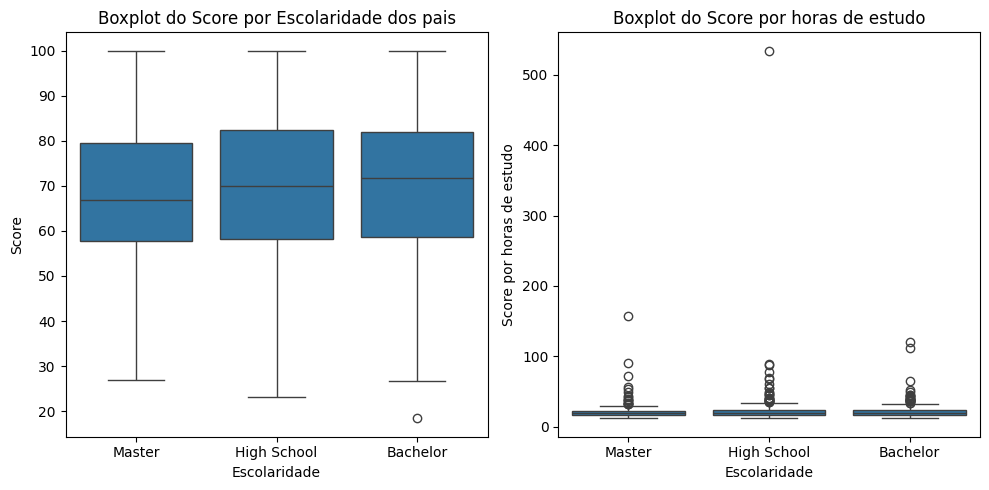

In [84]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='parental_education_level', y='exam_score')
plt.title('Boxplot do Score por Escolaridade dos pais')
plt.ylabel('Score')
plt.xlabel('Escolaridade')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='parental_education_level', y='score_hours')
plt.title('Boxplot do Score por horas de estudo')
plt.ylabel('Score por horas de estudo')
plt.xlabel('Escolaridade')
plt.tight_layout()

plt.show()

## Identificando o tipo de teste a ser aplicado

![Tabela de tipos de testes de hipótese](https://raw.githubusercontent.com/ufrpe-ensino/ia-aulas/refs/heads/master/assets/images/hypothesis-tests-table.png)

### Verificando normalidade dos dados

O teste de Shapiro-Wilk é utilizado para verificar se uma amostra segue uma distribuição normal. Ele retorna um valor de estatística e um valor-p (p-value). Se o valor-p for maior que 0,05, não rejeitamos a hipótese nula de normalidade, ou seja, os dados podem ser considerados normalmente distribuídos. Se o valor-p for menor que 0,05, rejeitamos a hipótese nula, indicando que os dados não seguem uma distribuição normal.

Normalidade (Shapiro) - Score Master: ShapiroResult(statistic=np.float64(0.9846035974597697), pvalue=np.float64(0.06183406954150235))
Normalidade (Shapiro) - Score High School: ShapiroResult(statistic=np.float64(0.9867175089478025), pvalue=np.float64(0.0011860848748835348))


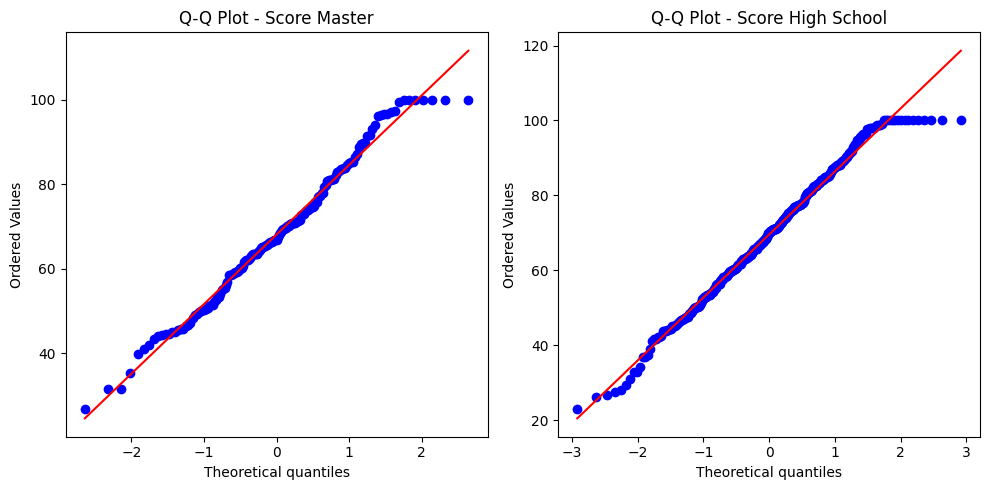

Os dados não seguem uma distribuição normal.


In [85]:
# 5. Testes de normalidade (Shapiro-Wilk)
print("Normalidade (Shapiro) - Score Master:", stats.shapiro(df[df['parental_education_level'] == 'Master']['exam_score']))
print("Normalidade (Shapiro) - Score High School:", stats.shapiro(df[df['parental_education_level'] == 'High School']['exam_score']))

# qqplot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
stats.probplot(df[df['parental_education_level'] == 'Master']['exam_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Score Master')
plt.subplot(1, 2, 2)
stats.probplot(df[df['parental_education_level'] == 'High School']['exam_score'], dist="norm", plot=plt)
plt.title('Q-Q Plot - Score High School')
plt.tight_layout()
plt.show()

# verificar a normalidade dos dados
if stats.shapiro(df['exam_score'])[1] > 0.05:
    print("Os dados seguem uma distribuição normal.")
else:
    print("Os dados não seguem uma distribuição normal.")

Nesse caso, podemos usar o teste de Mann-Whitney para comparar os Scores entre os dois tipos de Escolaridade.

### Aplicando o teste

In [86]:
# Teste de Mann-Whitney U
print("Teste de Mann-Whitney U entre os Sores dos tipos de Escolaridade:")
print(f"pvalue: {stats.mannwhitneyu(df[df['parental_education_level'] == 'Master']['exam_score'],df[df['parental_education_level'] == 'High School']['exam_score'])[1]}")

# conclusão
if stats.mannwhitneyu(df[df['parental_education_level'] == 'Master']['exam_score'],
                             df[df['parental_education_level'] == 'High School']['exam_score'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços dos tipos de imóveis.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços dos tipos de imóveis.")

Teste de Mann-Whitney U entre os Sores dos tipos de Escolaridade:
pvalue: 0.275733307941171
Não rejeitamos a hipótese nula: não há diferença significativa entre os preços dos tipos de imóveis.


In [96]:
# mesmo teste para o Score por Horas de Estudo
print("Teste de Mann-Whitney U entre os Scores por horas de estudo dos tipos de Escolaridade:")
print(f"pvalue: {stats.mannwhitneyu(df[df['parental_education_level'] == 'Master']['score_hours'], df[df['parental_education_level'] == 'High School']['score_hours'])[1]}")

# conclusão
if stats.mannwhitneyu(df[df['parental_education_level'] == 'Master']['score_hours'],
                             df[df['parental_education_level'] == 'High School']['score_hours'])[1] < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre os preços por m2 dos tipos de imóveis.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre os preços por m2 dos tipos de imóveis.")

Teste de Mann-Whitney U entre os Scores por horas de estudo dos tipos de Escolaridade:
pvalue: nan
Não rejeitamos a hipótese nula: não há diferença significativa entre os preços por m2 dos tipos de imóveis.
